In [2]:
import glob
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import Transformer

In [3]:
#img_point = plt.imread("./figs/전체/20230501_20230531.png")
img_point = plt.imread("./figs/전체/20210601_20210630.png")

# 색상 변경
img_point[:, :, 0] = img_point[:, :, 0]*img_point[:, :, 3]
img_point[:, :, 1] = img_point[:, :, 1]*img_point[:, :, 3]
img_point[:, :, 2] = img_point[:, :, 2]*img_point[:, :, 3]




"""
# 검은색 박스 제거
mask = np.logical_and(img_point[:, :, 3] > 0.01, np.sum(img_point[:, :, :3],axis=2) < 0.5)
#mask = np.expand_dims(mask, axis=2)
img_point[mask] = (0., 0., 0., 0.,)

# 색상 통일, 점 크기 키우기
img_point[:, :, 0] = img_point[:, :, 3]
img_point[:, :, 1] = 0.0
img_point[:, :, 2] = 0.0
#점 크기 키우기
gray_img = cv2.cvtColor(img_point, cv2.COLOR_RGBA2GRAY)
gray_img = (255.0 * gray_img).astype(np.uint8)

contour, _ = cv2.findContours(gray_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img_point = cv2.drawContours(img_point, contour, -1, color=(1., 0., 0., 1.,), thickness=12)

"""

'\n# 검은색 박스 제거\nmask = np.logical_and(img_point[:, :, 3] > 0.01, np.sum(img_point[:, :, :3],axis=2) < 0.5)\n#mask = np.expand_dims(mask, axis=2)\nimg_point[mask] = (0., 0., 0., 0.,)\n\n# 색상 통일, 점 크기 키우기\nimg_point[:, :, 0] = img_point[:, :, 3]\nimg_point[:, :, 1] = 0.0\nimg_point[:, :, 2] = 0.0\n#점 크기 키우기\ngray_img = cv2.cvtColor(img_point, cv2.COLOR_RGBA2GRAY)\ngray_img = (255.0 * gray_img).astype(np.uint8)\n\ncontour, _ = cv2.findContours(gray_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)\nimg_point = cv2.drawContours(img_point, contour, -1, color=(1., 0., 0., 1.,), thickness=12)\n\n'

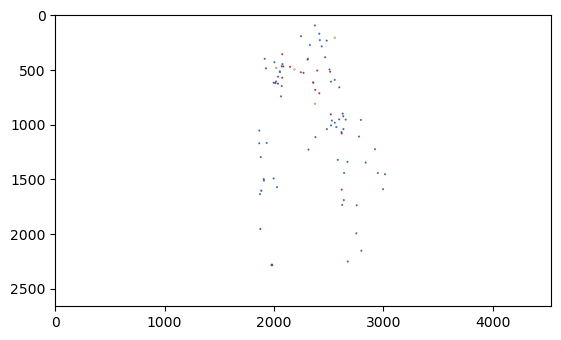

In [4]:
plt.imshow(img_point)
plt.show()

In [5]:
gray = cv2.cvtColor(img_point, cv2.COLOR_RGBA2GRAY)
gray = (gray * 255).astype(np.uint8)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 3,
                           param1=100, param2=10, minRadius=6, maxRadius=8)

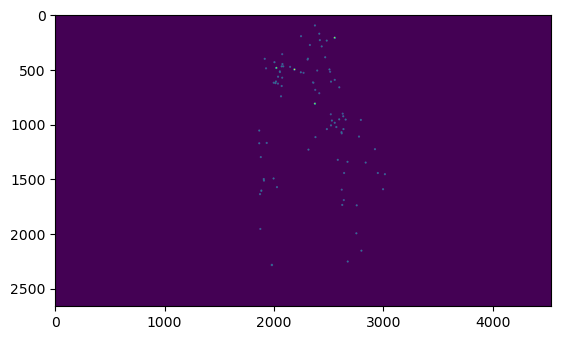

In [6]:
plt.imshow(gray)
plt.show()

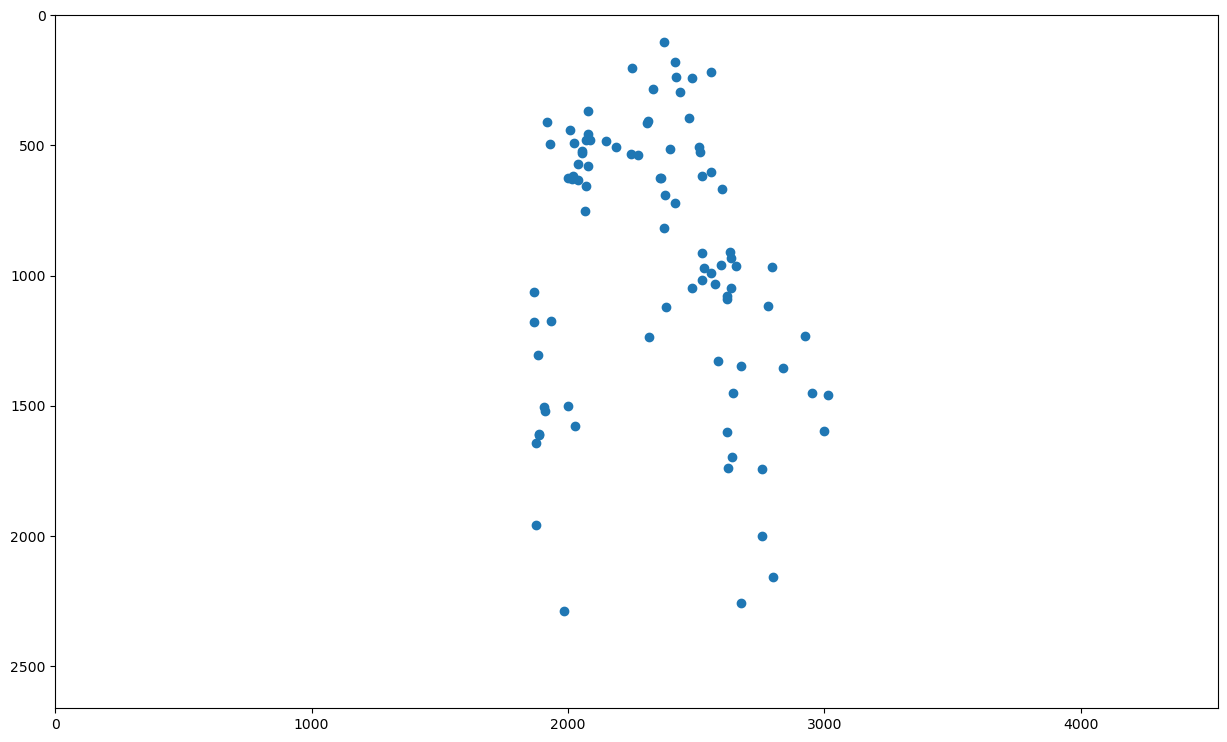

In [10]:
plt.figure(figsize=[15, 9])
plt.scatter(circles[0, :, 0], circles[0, :, 1])
plt.xlim([0, 4535])
plt.ylim([0, 2662])
plt.gca().invert_yaxis()
plt.show()

In [192]:
circles[0, :, 2]

array([14.8, 14.8, 14.8, 14.8, 14.8, 14.8, 14.8, 14.8, 14.8, 14.8, 14.7,
       14.5, 14.8, 14.8, 14.8, 14.8, 14.7, 14.7, 14.8, 14.8, 14.8, 14.7,
       14.8, 14.7, 14.5, 14.8, 14.8, 14.8, 14.8, 14.5, 14.5, 14.5, 14.5,
       14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5,
       14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5,
       14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5,
       14.5, 14.5, 14.5, 14.5, 14.5, 14.7], dtype=float32)

# 시각화 그림들

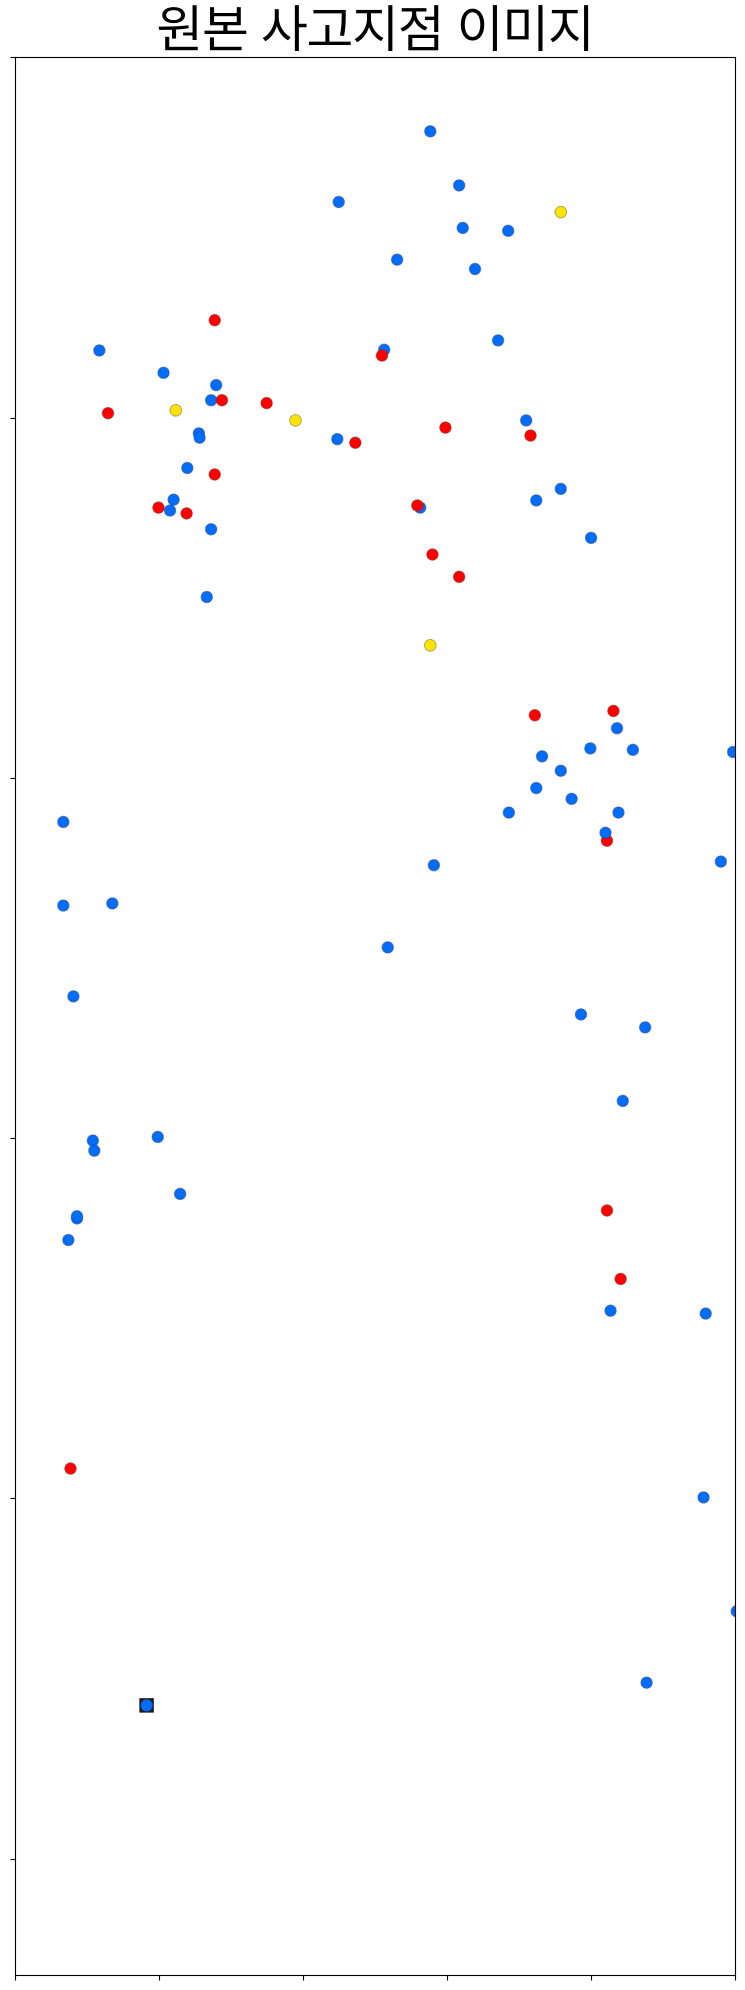

In [13]:
from matplotlib import font_manager
x_range = [1800, 2800]
y_range = [50, 1000]

font_hangeul = font_manager.FontProperties(fname="./fonts/Pretendard-Regular.ttf", size=24)

plt.figure(figsize=[21, 20])

#plt.subplot(1, 2, 1)
plt.title("원본 사고지점 이미지",font_properties=font_hangeul,fontsize=38)
plt.imshow(img_point)
#plt.xlim(x_range)
#plt.ylim(y_range,)
#plt.gca().invert_yaxis()
#plt.gca().set_xticklabels("")
#plt.gca().set_yticklabels("")


#plt.subplot(1, 2, 2)a
#plt.title("원 인식 추출 결과",font_properties=font_hangeul,fontsize=38)

plt.xlim(x_range)
#plt.ylim(y_range)
#plt.xlim([0, 4535])
#plt.ylim([0, 2662])
#plt.gca().invert_yaxis()
plt.gca().set_xticklabels("")
plt.gca().set_yticklabels("")
plt.gca().set_aspect("equal",)
plt.tight_layout()
plt.show()

C:\Users\xaiseung24\AppData\Local\Temp\ipykernel_11436\2955445742.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(circles[0, :, 0]-0.5, circles[0, :, 1]-0.5, c=(0.0, 1.0, 0.0, 1.0), marker="P", s=90, label="인식 지점")


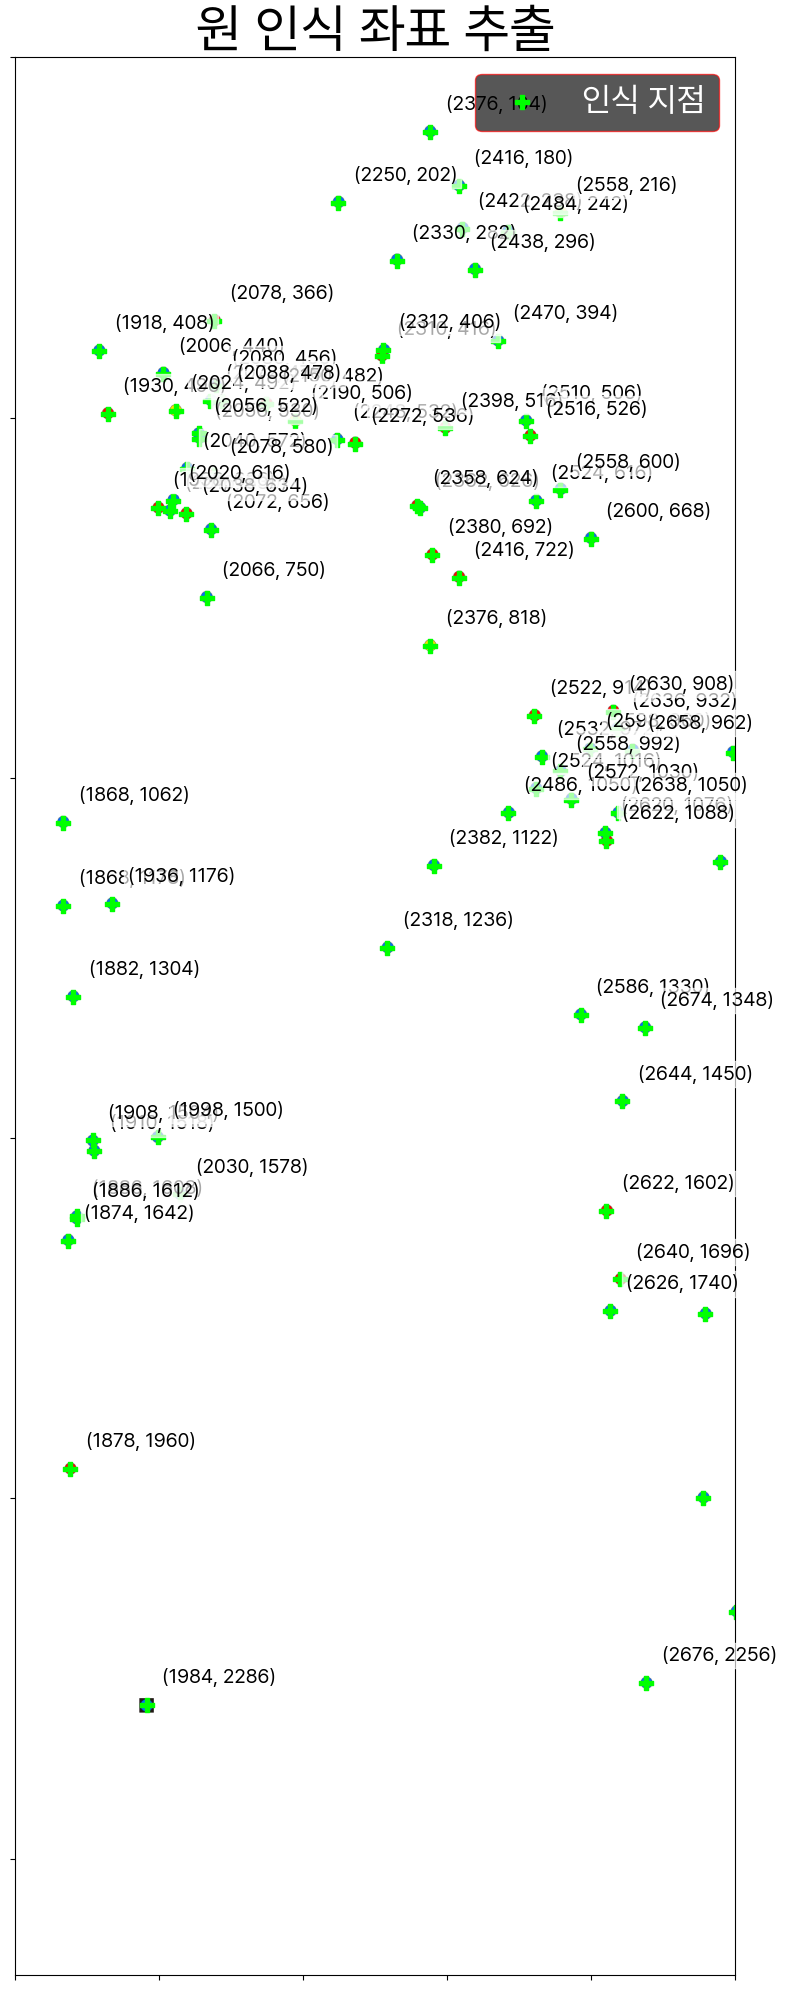

In [14]:
from matplotlib import font_manager
x_range = [1800, 2800]
y_range = [50, 1000]

font_hangeul = font_manager.FontProperties(fname="./fonts/Pretendard-Regular.ttf", size=24)

plt.figure(figsize=[21, 20])

#plt.subplot(1, 2, 1)
plt.title("원 인식 좌표 추출",font_properties=font_hangeul,fontsize=38)
plt.imshow(img_point)
#plt.xlim(x_range)
#plt.ylim(y_range,)
#plt.gca().invert_yaxis()
#plt.gca().set_xticklabels("")
#plt.gca().set_yticklabels("")


#plt.subplot(1, 2, 2)
#plt.title("원 인식 추출 결과",font_properties=font_hangeul,fontsize=38)
c = 0.2+np.random.random(size=[circles.shape[1],3])*0.6
plt.scatter(circles[0, :, 0]-0.5, circles[0, :, 1]-0.5, c=(0.0, 1.0, 0.0, 1.0), marker="P", s=90, label="인식 지점")
for x, y, r in circles[0]:
    if x > 1800 and x < 2750:
        plt.annotate(f"({x:.0f}, {y:.0f})",
                    xy=(x, y),
                    xytext=(11, 16),
                    textcoords='offset points',
                    #ha="center",
                    #va="top",
                    backgroundcolor = (1, 1, 1, 0.66),
                    font_properties=font_hangeul, fontsize=14)
plt.legend(labelcolor="white", prop=font_hangeul, edgecolor=(1.0, 0.0, 0.0), facecolor=(0.0, 0.0, 0.0), framealpha=0.66)

plt.xlim(x_range)
#plt.ylim(y_range)
#plt.xlim([0, 4535])
#plt.ylim([0, 2662])
#plt.gca().invert_yaxis()
plt.gca().set_xticklabels("")
plt.gca().set_yticklabels("")
plt.gca().set_aspect("equal",)
plt.tight_layout()
plt.show()

C:\Users\xaiseung24\AppData\Local\Temp\ipykernel_5500\40187376.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(circles[0, :, 0]-0.5, circles[0, :, 1]-0.5, c=(0.0, 1.0, 0.0, 1.0), marker="P", s=90, label="인식 지점")


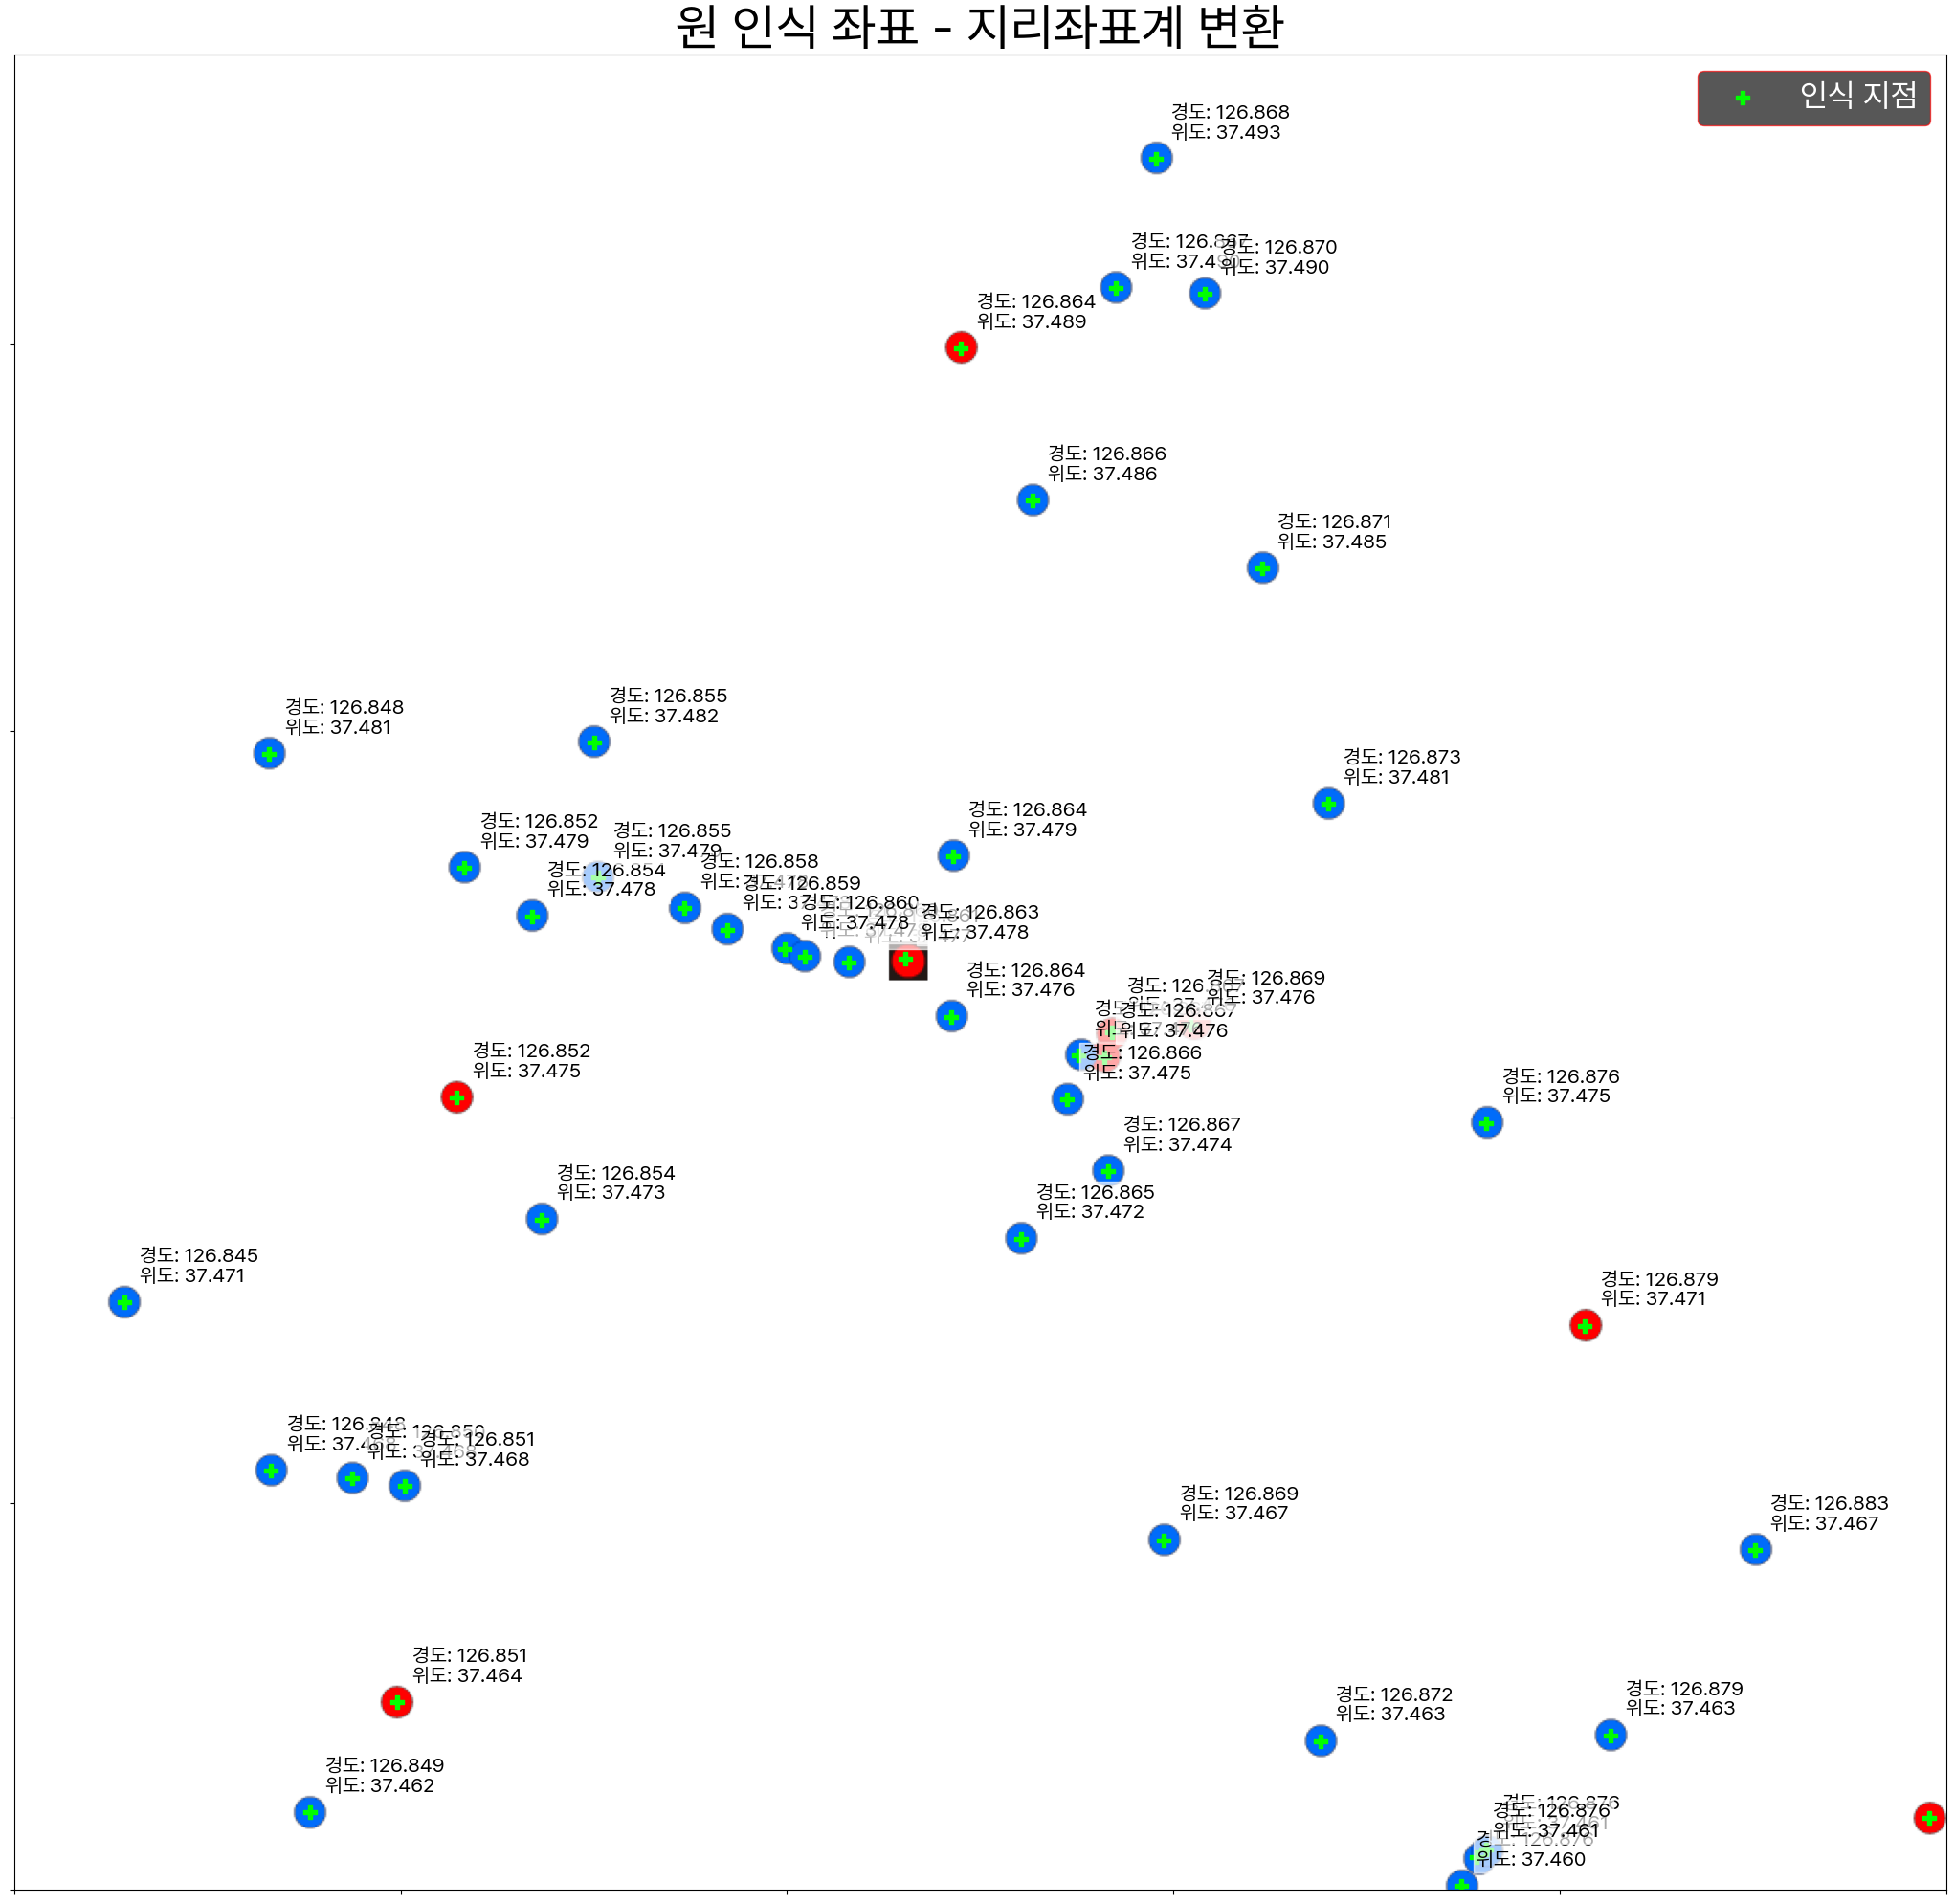

In [163]:
xw = 3.985 #3.9909
xb = 934605.5994 + 220
yw = -4.005 #-3.9909
yb = 1944140.8609 + (-143)

def px_to_utmk(px:np.ndarray) -> np.ndarray:
    # px.shape: [N, 2]
    res = px.copy()
    res[:, 0] = xb + px[:, 0]*xw 
    res[:, 1] = yb + px[:, 1]*yw
    return res

transformer = Transformer.from_crs("EPSG:5178", "EPSG:4326", always_xy=True)
def px_to_wgs84(px:np.ndarray):
    res = px_to_utmk(px)
    x, y = transformer.transform(res[:, 0], res[:, 1])
    return np.stack([x, y], axis=-1)


from matplotlib import font_manager
x_range = [1800, 2800]
y_range = [50, 1000]

font_hangeul = font_manager.FontProperties(fname="./fonts/Pretendard-Regular.ttf", size=24)

plt.figure(figsize=[21, 20])

#plt.subplot(1, 2, 1)
plt.title("원 인식 좌표 - 지리좌표계 변환",font_properties=font_hangeul,fontsize=38)
plt.imshow(img_point)
#plt.xlim(x_range)
#plt.ylim(y_range,)
#plt.gca().invert_yaxis()
#plt.gca().set_xticklabels("")
#plt.gca().set_yticklabels("")


#plt.subplot(1, 2, 2)
#plt.title("원 인식 추출 결과",font_properties=font_hangeul,fontsize=38)
c = 0.2+np.random.random(size=[circles.shape[1],3])*0.6
plt.scatter(circles[0, :, 0]-0.5, circles[0, :, 1]-0.5, c=(0.0, 1.0, 0.0, 1.0), marker="P", s=90, label="인식 지점")

for tmp in circles[0]:
    x, y, z = tmp
    if x > 1800 and x < 2750:
        new_xy = px_to_wgs84(tmp[np.newaxis, :2])
        lant, long = new_xy[0]
        plt.annotate(f"경도: {lant:.3f}\n위도: {long:.3f}",
                    xy=(x, y),
                    xytext=(11, 16),
                    textcoords='offset points',
                    #ha="center",
                    #va="top",
                    backgroundcolor = (1, 1, 1, 0.66),
                    font_properties=font_hangeul, fontsize=15)
plt.legend(labelcolor="white", prop=font_hangeul, edgecolor=(1.0, 0.0, 0.0), facecolor=(0.0, 0.0, 0.0), framealpha=0.66)

plt.xlim(x_range)
plt.ylim(y_range)
#plt.xlim([0, 4535])
#plt.ylim([0, 2662])
plt.gca().invert_yaxis()
plt.gca().set_xticklabels("")
plt.gca().set_yticklabels("")
plt.gca().set_aspect("equal",)
plt.tight_layout()
plt.show()